In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#import csv file

In [11]:
df=pd.read_excel(r'.\Debourgh-Sales.xlsx', sheet_name='Sheet2')

In [12]:
df.head()

,Years,Sales
0,2001-01-01,139.7
1,2001-02-01,114.3
2,2001-03-01,101.6
3,2001-04-01,152.4
4,2001-05-01,215.9


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Years   108 non-null    datetime64[ns]
 1   Sales   108 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.8 KB


In [14]:
#using sns for lineplot

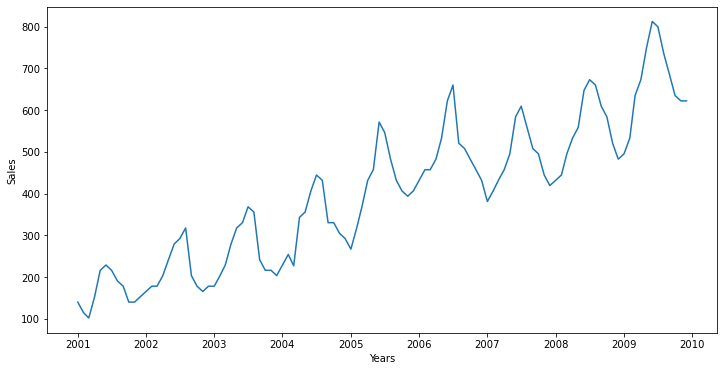

In [15]:
plt.figure(figsize=[12,6])
sns.lineplot(x='Years',y='Sales', data=df)
plt.show()

In [16]:
dp=df.set_index('Years')
dp

,Sales
Years,
2001-01-01,139.7
2001-02-01,114.3
2001-03-01,101.6
2001-04-01,152.4
2001-05-01,215.9
...,...
2009-08-01,736.6
2009-09-01,685.5
2009-10-01,635.0


In [17]:
#using pandas for lineplot

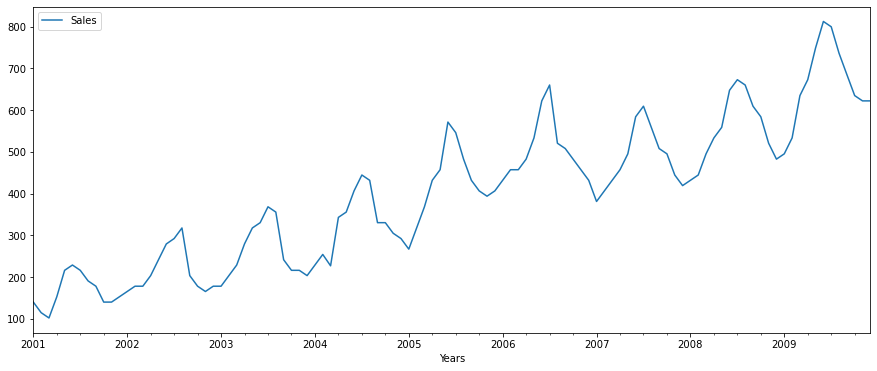

In [18]:
fig,ax=plt.subplots(figsize=[15,6])
dp.plot(kind='line', ax=ax)

In [19]:
#extract year month date

In [23]:
df['Years'].dt.year

0      2001
1      2001
2      2001
3      2001
4      2001
       ... 
103    2009
104    2009
105    2009
106    2009
107    2009
Name: Years, Length: 108, dtype: int64

In [24]:
df['Years'].dt.day

0      1
1      1
2      1
3      1
4      1
      ..
103    1
104    1
105    1
106    1
107    1
Name: Years, Length: 108, dtype: int64

In [25]:
df['Years'].dt.quarter

0      1
1      1
2      1
3      2
4      2
      ..
103    3
104    3
105    4
106    4
107    4
Name: Years, Length: 108, dtype: int64

In [27]:
df['year']=df['Years'].dt.year
df['quarter']=df['Years'].dt.quarter

In [28]:
df.head()

,Years,Sales,year,quarter
0,2001-01-01,139.7,2001,1
1,2001-02-01,114.3,2001,1
2,2001-03-01,101.6,2001,1
3,2001-04-01,152.4,2001,2
4,2001-05-01,215.9,2001,2


In [29]:
#adding hue i.e. to say color

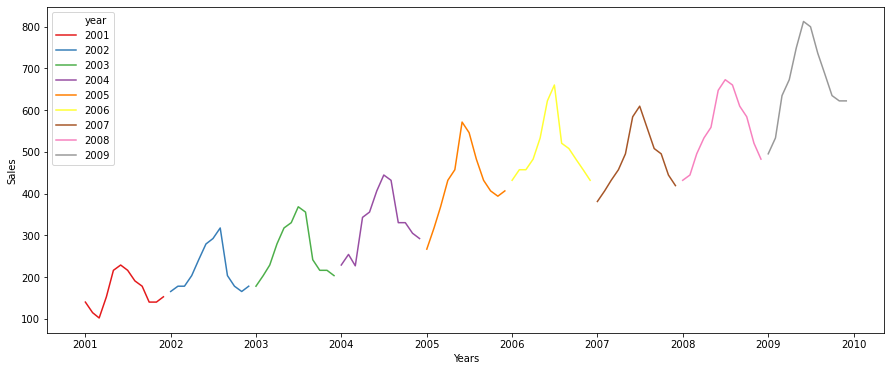

In [72]:
plt.figure(figsize=[15,6])
sns.lineplot(x='Years',y='Sales',data=df,hue='year', palette='Set1')
plt.show()

In [34]:
#area plot

In [35]:
dp.head()

,Sales
Years,
2001-01-01,139.7
2001-02-01,114.3
2001-03-01,101.6
2001-04-01,152.4
2001-05-01,215.9


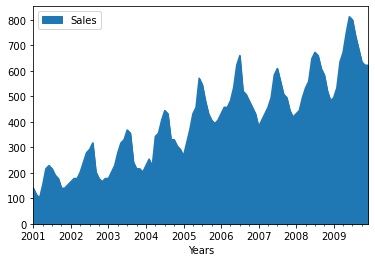

In [38]:

dp.plot(kind='area')

In [40]:
 df_year=df[['Sales','year']].groupby(by='year').sum().reset_index()

In [41]:
df_year

,year,Sales
0,2001,1968.5
1,2002,2577.8
2,2003,3136.9
3,2004,3947.8
4,2005,5080.0
5,2006,6045.2
6,2007,5791.2
7,2008,6642.1
8,2009,8000.7


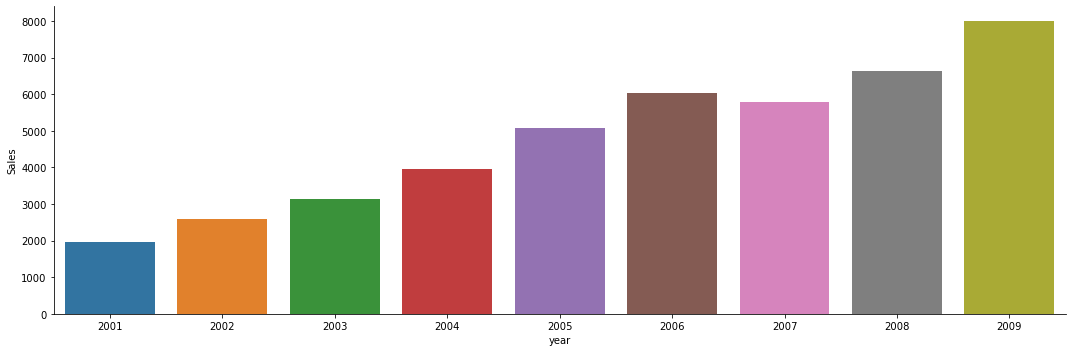

In [42]:

sns.catplot(x='year',y='Sales',data=df_year, kind='bar', aspect=3)

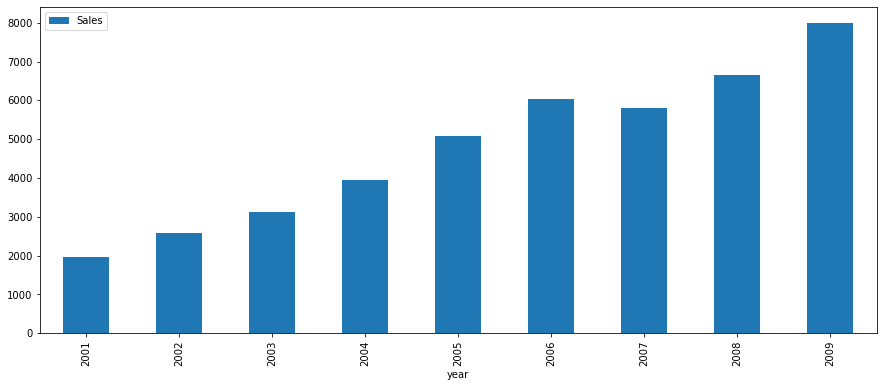

In [43]:
fig,ax=plt.subplots(figsize=[15,6])
df_year.set_index('year').plot(kind='bar', ax=ax)

In [46]:
df

,Years,Sales,year,quarter
0,2001-01-01,139.7,2001,1
1,2001-02-01,114.3,2001,1
2,2001-03-01,101.6,2001,1
3,2001-04-01,152.4,2001,2
4,2001-05-01,215.9,2001,2
...,...,...,...,...
103,2009-08-01,736.6,2009,3
104,2009-09-01,685.5,2009,3
105,2009-10-01,635.0,2009,4
106,2009-11-01,622.3,2009,4


In [191]:
# stacked bar plot

In [48]:
sales=df[['Sales', 'year','quarter']].groupby(by=['year', 'quarter']).sum().values

In [49]:
sales

array([[ 355.6],
       [ 596.9],
       [ 584.2],
       [ 431.8],
       [ 520.7],
       [ 723.6],
       [ 812.8],
       [ 520.7],
       [ 609.6],
       [ 927.1],
       [ 965.2],
       [ 635. ],
       [ 709.3],
       [1104.9],
       [1206.5],
       [ 927.1],
       [ 952.5],
       [1460.5],
       [1460.5],
       [1206.5],
       [1346.2],
       [1638.3],
       [1689.1],
       [1371.6],
       [1219.2],
       [1536.7],
       [1676.4],
       [1358.9],
       [1371.6],
       [1739.9],
       [1943.1],
       [1587.5],
       [1663.7],
       [2235.2],
       [2222.2],
       [1879.6]])

In [50]:
sales.shape

(36, 1)

In [52]:
sales.reshape(9,4)

array([[ 355.6,  596.9,  584.2,  431.8],
       [ 520.7,  723.6,  812.8,  520.7],
       [ 609.6,  927.1,  965.2,  635. ],
       [ 709.3, 1104.9, 1206.5,  927.1],
       [ 952.5, 1460.5, 1460.5, 1206.5],
       [1346.2, 1638.3, 1689.1, 1371.6],
       [1219.2, 1536.7, 1676.4, 1358.9],
       [1371.6, 1739.9, 1943.1, 1587.5],
       [1663.7, 2235.2, 2222.2, 1879.6]])

In [54]:
df_sales=pd.DataFrame(sales.reshape(9,4), index=list(range(2001,2010)), columns=['q1','q2','q3','q4'])

In [55]:
df_sales.head()

,q1,q2,q3,q4
2001,355.6,596.9,584.2,431.8
2002,520.7,723.6,812.8,520.7
2003,609.6,927.1,965.2,635.0
2004,709.3,1104.9,1206.5,927.1
2005,952.5,1460.5,1460.5,1206.5


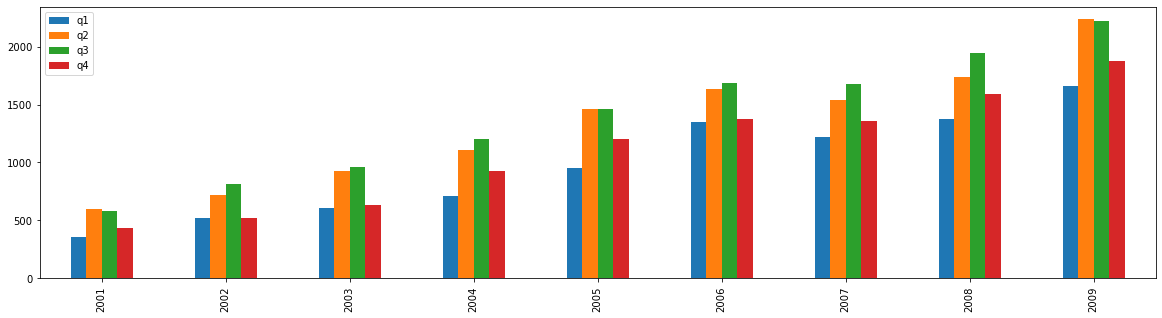

In [56]:
fig,ax=plt.subplots(figsize=[20,5])
df_sales.plot(kind='bar', ax=ax)

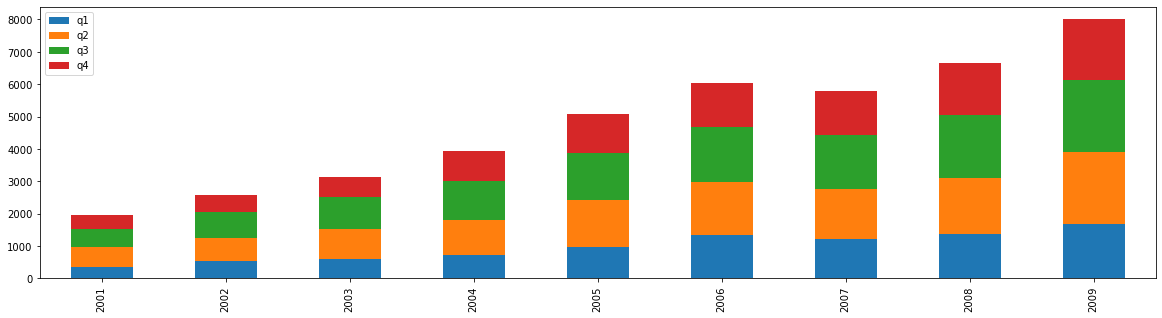

In [57]:
fig,ax=plt.subplots(figsize=[20,5])
df_sales.plot(kind='bar', ax=ax, stacked=True)

In [58]:
areastack=df_sales.drop(['q1'],axis=1)

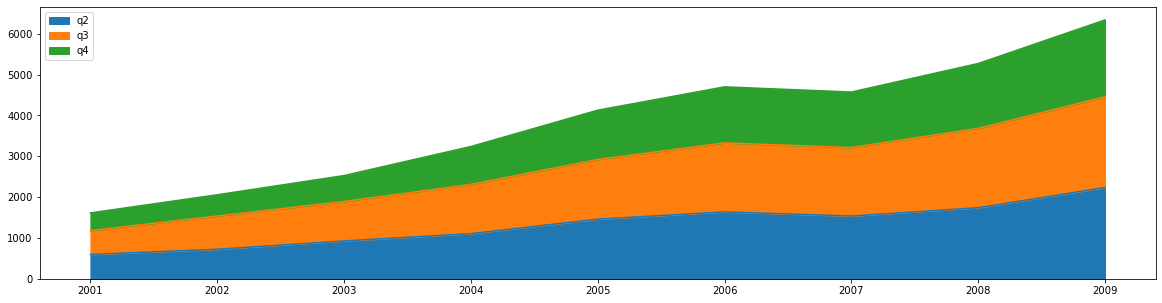

In [59]:
fig,ax=plt.subplots(figsize=[20,5])
areastack.plot(kind='area', ax=ax, stacked=True)

In [60]:
#heatmaps


In [61]:
df_sales.head()

,q1,q2,q3,q4
2001,355.6,596.9,584.2,431.8
2002,520.7,723.6,812.8,520.7
2003,609.6,927.1,965.2,635.0
2004,709.3,1104.9,1206.5,927.1
2005,952.5,1460.5,1460.5,1206.5


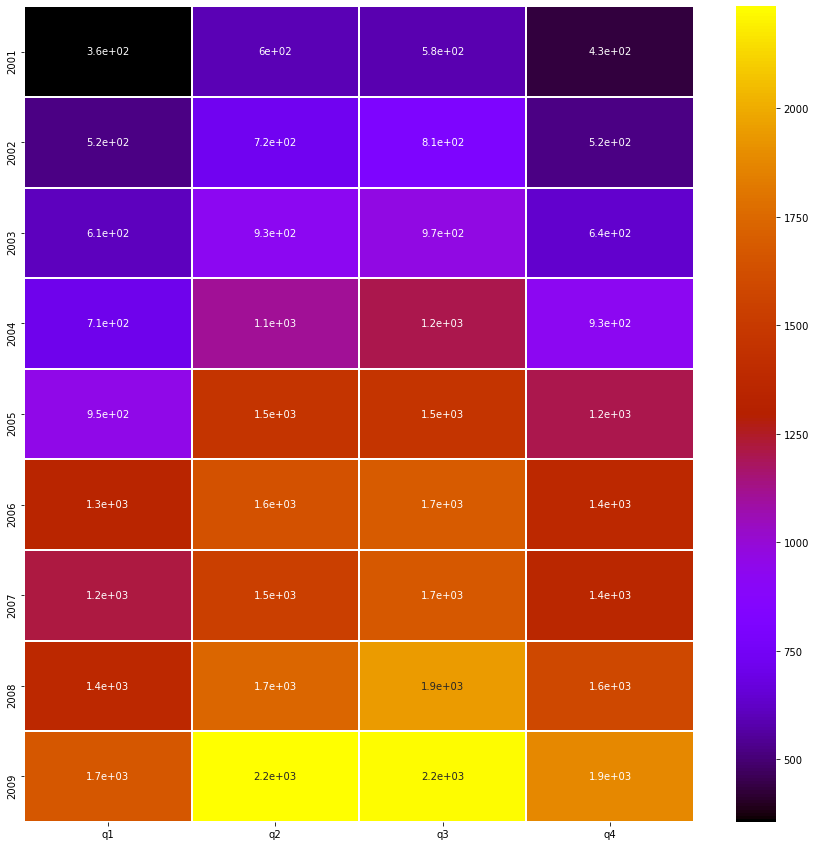

In [62]:
plt.figure(figsize=[15,15])
sns.heatmap(df_sales,annot=True, fmt='.2g', cmap='gnuplot', linewidth=1 )
plt.show()